<a href="https://colab.research.google.com/github/TrunnMosby/GSoC-RedHenLabs-Aztec-Glyph-Detection/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import  os
import numpy as np

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt

In [ ]:
base_models=tf.keras.applications.VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=base_models.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


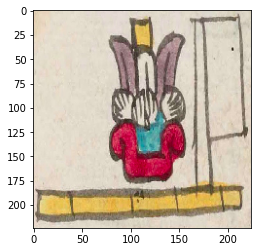

In [ ]:
img, x = load_image("/content/drive/MyDrive/Everything/Acapan20r.jpeg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
predictions = base_models.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

49152/35363 [=========================================] - 0s 0us/step
predicted carpenter's_kit with probability 0.122
predicted bow with probability 0.092
predicted wall_clock with probability 0.076
predicted doormat with probability 0.057
predicted hair_slide with probability 0.049


In [ ]:
feat_extractor = Model(inputs=base_models.input, outputs=base_models.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 134,260,544
Trainable params: 134,260,544
Non-trainable params: 0
_________________________________________________________________


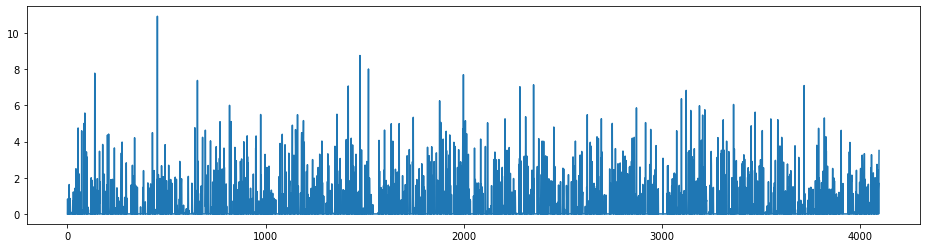

In [ ]:
img, x = load_image("/content/drive/MyDrive/Everything/Acazacatlan50r.jpeg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
images_path = '/content/drive/MyDrive/Everything'
image_extensions = ['.jpg', '.png', '.jpeg']   
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 1255 images to analyze


In [ ]:
import time
tic = time.clock()
features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


analyzing image 0 / 1255. Time: 0.0006 seconds.
analyzing image 500 / 1255. Time: 539.4760 seconds.
analyzing image 1000 / 1255. Time: 540.6529 seconds.
finished extracting features for 1255 images


In [ ]:
loc1=r'/content/drive/MyDrive/Aztec Glyphs Image Data Set/Everything'
loc2=os.listdir(loc1)
name=[]
for i in loc2:
    name.append(i.split('.')[0])
name=sorted(name,key=str.lower)

In [ ]:
images[4]

'/content/drive/MyDrive/Aztec Glyphs Image Data Set/Everything/atoctli29rhumidsoilFromAtocpan.jpeg'

Text(0.5, 1.0, 'atoctli29rhumidsoilFromAtocpan.jpeg')

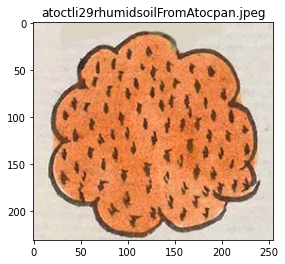

In [ ]:
import random
query_image_idx = 4
img = image.load_img(images[query_image_idx])
plt.imshow(img)
plt.title(images[query_image_idx].split('/')[-1])

In [ ]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(features[query_image_idx], feat) for feat in features ]

In [ ]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

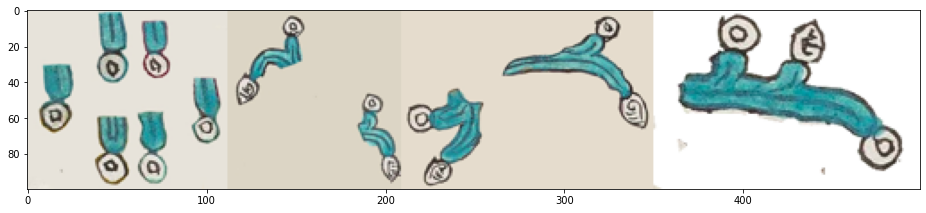

In [ ]:
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(features[query_image_idx], feat) for feat in features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Names of the similar images:-
Ohuapan37r.jpeg
amilli25rirrigatedfieldFromAmiltzinco.jpg
Atocpan29r.jpeg
cuahuitl13vtreeFromCuauhixayacatitlan.jpeg
acatl23rreedFromMiacatlan.jpeg


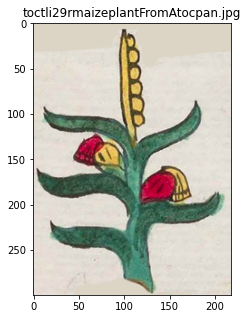

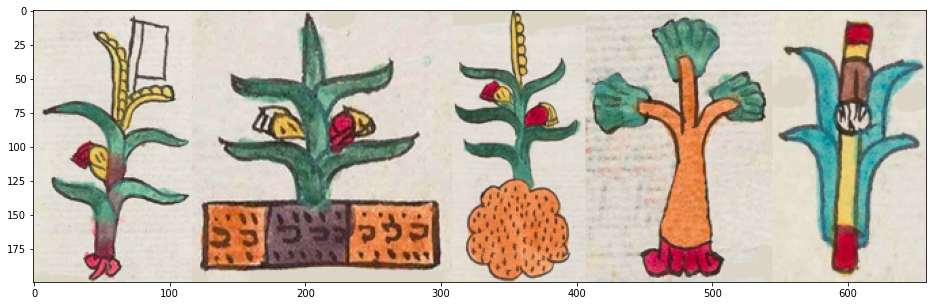

In [ ]:
query_image_idx = 5
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Ichcateopan37r.jpeg
Quiyauhteopan8r.jpeg
temoa27rAllDescend(verb)SIMPLEXforTemoayan.jpeg
Temoayan27rSIMPLEX.jpeg
teopan42rtempleFromTeopantlan.jpeg


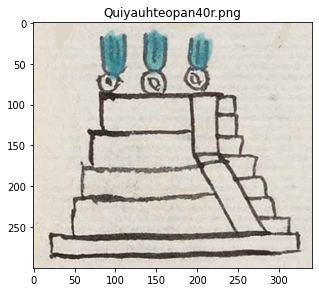

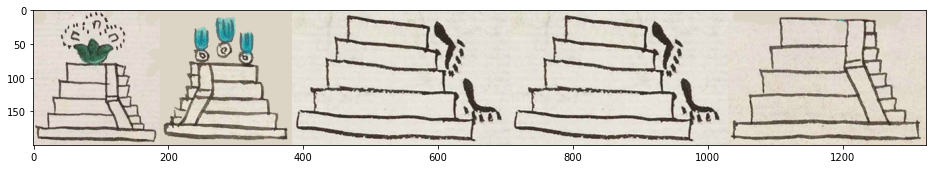

In [ ]:
query_image_idx = 1000
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Chilapan37r.jpeg
Quecholac42r.jpeg
Michapan46r.jpeg
Tzayanalquilpan31r.png
Miahuaapan52r.png


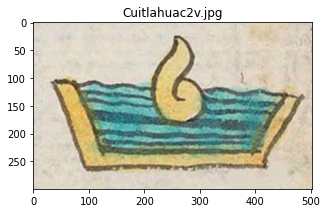

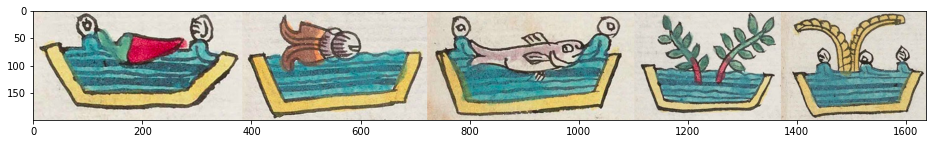

In [ ]:
query_image_idx = 1030
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
xocotl55rhogplumtreeFromXocoyocan.png
Xochicuauhtitlan50r.jpeg
Alhuexoyocan26r.jpeg
Huehuetlan47rSIMPLEX.jpeg
huehue47roldmanSAforHuehuetlan.jpeg


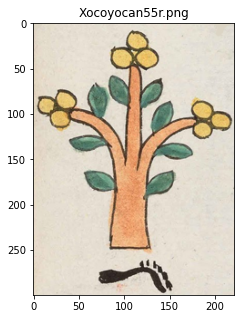

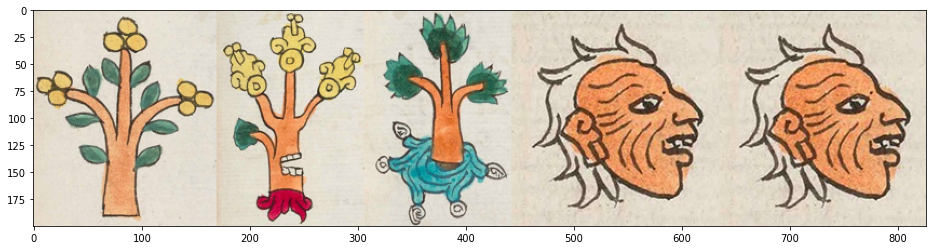

In [ ]:
query_image_idx = 1005
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Cuauhtlan13v.jpeg
cuauhtli24veagleSAforCuauhtlan24v.jpeg
Cuauhtlan24vSIMPLEX.jpeg
coyotl13rcoyoteFromCoyocac.jpg
cuauhtli32reagleFromCuahuacan.jpg


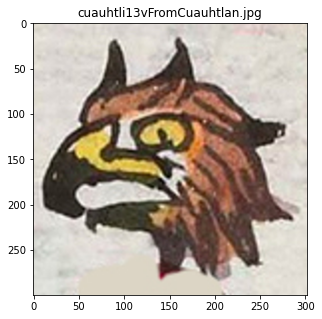

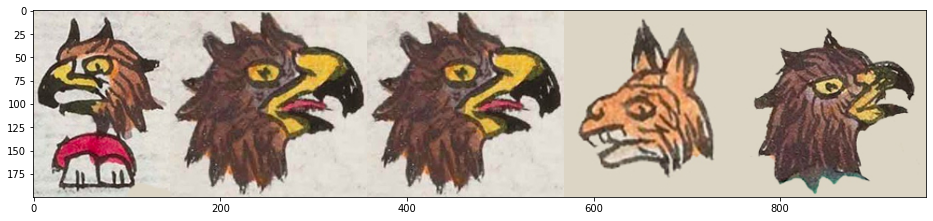

In [ ]:
query_image_idx = 1200
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
pechtli21vrug,foundationFromTepechpan.png
Tepechpan21v.jpeg
Tecalco42r.jpeg
calli42rhouse,buildingFromTecalco.jpeg
Nacochtlan42rSIMPLEX.jpeg


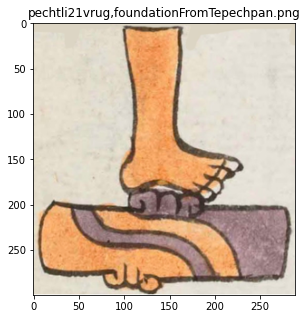

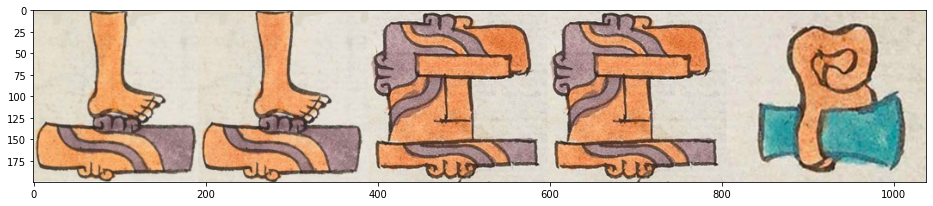

In [ ]:
query_image_idx = 900
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])